### Vấn đề: Xây dựng mô hình dự đoán giá trung bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất, kinh doanh

1. Tạo mô hình dự đoán giá bơ trung bình của Mỹ (sử dụng các thuật toán Regression)

2. Dự đoán giá bơ hữu cơ của vùng California (sử dụng các thuật toán Time Series)

#### 3. Dự đoán giá bơ thường của vùng California (sử dụng mô hình ở câu 1 và 2)

4. Chọn 1 vùng mà bạn cho rằng trong tương lai có thể mở rộng trồng trọt, sản xuất và kinh doanh bơ thường và/hoặc bơ hữu cơ. Hãy chứng minh.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from cheating_model import *
from cheating_result import *
from cheating_visualization import *

In [3]:
data0 = pd.read_csv('avocado.csv')
print(data0.shape)
data0

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
data0.drop('Unnamed: 0',axis=1,inplace=True)
data0.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
data = data0[(data0['type']=='conventional')&(data0['region']=='California')]
data.shape

(169, 13)

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 312 to 8561
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
 2   Total Volume  169 non-null    float64       
 3   4046          169 non-null    float64       
 4   4225          169 non-null    float64       
 5   4770          169 non-null    float64       
 6   Total Bags    169 non-null    float64       
 7   Small Bags    169 non-null    float64       
 8   Large Bags    169 non-null    float64       
 9   XLarge Bags   169 non-null    float64       
 10  type          169 non-null    object        
 11  year          169 non-null    int64         
 12  region        169 non-null    object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 18.5+ KB


In [7]:
data['month'] = list(pd.DatetimeIndex(data['Date']).month)
data['month'].value_counts()

1     18
3     17
2     16
10    14
7     14
5     14
12    13
11    13
8     13
4     13
9     12
6     12
Name: month, dtype: int64

In [8]:
def to_seasons(month):
    if month in [3,4,5]:
        return 0
    elif month in [6,7,8]:
        return 1
    elif month in [9,10,11]:
        return 2
    else:
        return 3
    
data['season'] = data['month'].apply(lambda x: to_seasons(x))
data['season'].value_counts()

3    47
0    44
2    39
1    39
Name: season, dtype: int64

## RandomForestRegressor

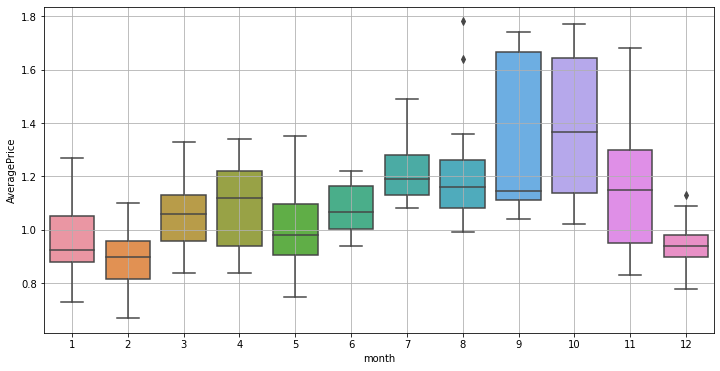

In [9]:
plt.figure(figsize=(12,6))
sb.boxplot(y='AveragePrice', x='month',data=data)
plt.grid()
plt.show()

### Nhận xét
- Có sự chênh lệch lớn về giá bơ thường của vùng California giữa các tháng
#### => Tháng có tác động đến giá cả

In [10]:
data[['AveragePrice','month','season']][(data['AveragePrice']>1.6)&(data['month']==8)]

,AveragePrice,month,season
5952,1.78,8,1
5953,1.64,8,1


In [11]:
out_idx = data[['AveragePrice','month','season']][(data['AveragePrice']>1.6)
                                                  &(data['month']==8)].index
out_idx

Int64Index([5952, 5953], dtype='int64')

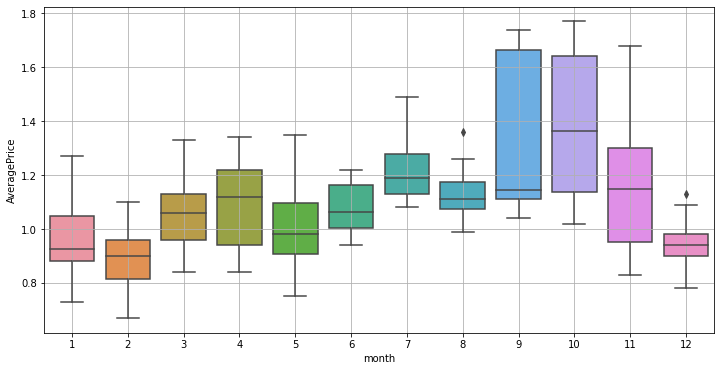

In [12]:
# loai bo outliers
df = data.drop(index=out_idx)

plt.figure(figsize=(12,6))
sb.boxplot(y='AveragePrice', x='month',data=df)
plt.grid()
plt.show()

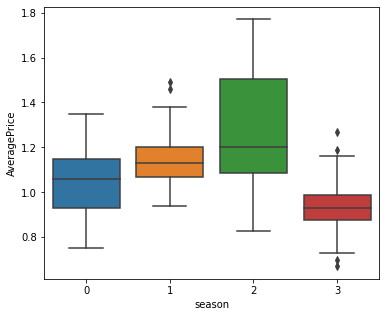

In [13]:
plt.figure(figsize=(6,5))
sb.boxplot(y='AveragePrice', x='season',data=df)
plt.show()

### Nhận xét
- Cũng giống như tháng, giá bơ thường của vùng California có sự chênh lệch lớn giữa các mùa
#### => Mùa có tác động đến giá cả

In [14]:
df[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
    'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.658074,-0.429791,-0.550343,-0.399606,-0.297735,-0.264873,-0.481949,0.311483
Total Volume,-0.658074,1.000000,0.641281,0.744073,0.313617,0.567387,0.561312,0.317763,0.136686
4046,-0.429791,0.641281,1.000000,0.355563,0.125850,-0.146209,-0.130479,-0.124286,-0.225972
4225,-0.550343,0.744073,0.355563,1.000000,0.220774,0.220564,0.200541,0.279415,-0.065270
4770,-0.399606,0.313617,0.125850,0.220774,1.000000,0.158136,0.105424,0.566465,-0.399339
Total Bags,-0.297735,0.567387,-0.146209,0.220564,0.158136,1.000000,0.993710,0.432400,0.577135
Small Bags,-0.264873,0.561312,-0.130479,0.200541,0.105424,0.993710,1.000000,0.331521,0.614252
Large Bags,-0.481949,0.317763,-0.124286,0.279415,0.566465,0.432400,0.331521,1.000000,-0.223953
XLarge Bags,0.311483,0.136686,-0.225972,-0.065270,-0.399339,0.577135,0.614252,-0.223953,1.000000


In [15]:
X = df[['season','month',
        'Total Volume',
        'Total Bags', 'Large Bags', 'XLarge Bags']] #,'4225'
y = df['AveragePrice']

In [16]:
x = pd.get_dummies(data=X,columns=['month','season'])
x_cols = x.columns
print(x_cols)
x.head()

Index(['Total Volume', 'Total Bags', 'Large Bags', 'XLarge Bags', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'season_0',
       'season_1', 'season_2', 'season_3'],
      dtype='object')


,Total Volume,Total Bags,Large Bags,XLarge Bags,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_0,season_1,season_2,season_3
312,5040365.47,1212707.01,110737.35,11829.59,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
313,4695737.21,1209165.20,136747.10,10714.52,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
314,5259354.30,1592438.33,180150.37,8275.96,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
315,5775536.27,1510267.34,126664.37,6962.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
316,4575710.62,1081497.47,82338.39,7590.24,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [17]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [18]:
scaler = RobustScaler().fit(x)
x = pd.DataFrame(scaler.transform(x),columns=x_cols)

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((116, 20), (51, 20), (116,), (51,))

>>> train R-square: 1.0
>>> test R-square: 0.9031825239562136
>>> MSE: 0.0049518063058823945
>>> MAE: 0.051639215686274886


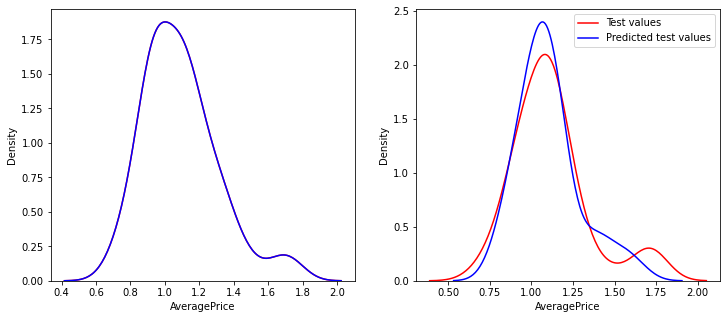

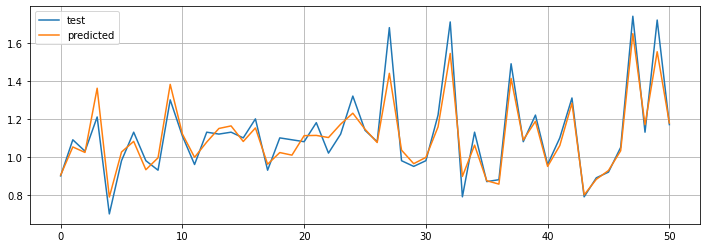

In [20]:
model = RandomForestRegressor(bootstrap=False, max_features='log2',
                              n_estimators=250).fit(xtrain,ytrain)
ycon_result(xtrain,xtest,ytrain,ytest,model)

### Đánh giá
- Thuật toán RandomForestRegressor với bootstrap=False, ax_features='log2', n_estimators=250 cho ra kết quả lên đến 90%
#### => Có thể sử dụng mô hình


## fbprophet

In [9]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from sklearn.metrics import *

Importing plotly failed. Interactive plots will not work.


In [10]:
print(data.shape)
data.head()

(169, 15)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,season
312,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California,12,3
313,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California,12,3
314,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California,12,3
315,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California,12,3
316,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California,11,2


In [11]:
df = data[['Date','AveragePrice']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 312 to 8561
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [12]:
df = df.sort_values('Date')
df.reset_index(inplace=True,drop=True)
df.columns = ['ds','y']
df

,ds,y
0,2015-01-04,0.93
1,2015-01-11,0.92
2,2015-01-18,1.02
3,2015-01-25,1.06
4,2015-02-01,0.85
...,...,...
164,2018-02-25,1.03
165,2018-03-04,1.13
166,2018-03-11,1.11
167,2018-03-18,1.02


In [13]:
df.ds.freq = 'W-SUN'

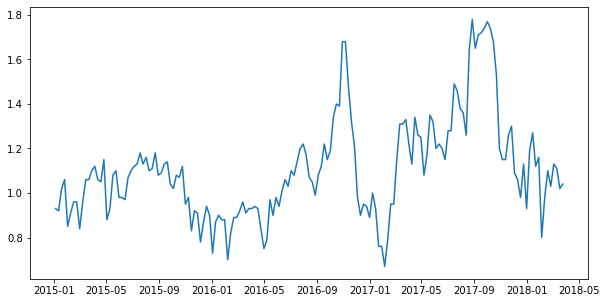

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df['ds'],df['y'])
plt.show()

- Giá bơ dao động nhiều

In [15]:
len(df)*(70/100)

118.3

In [16]:
train,test = df.iloc[:118,:], df.iloc[118:,:]
train.shape, test.shape

((118, 2), (51, 2))

In [17]:
train.tail()

,ds,y
113,2017-03-05,1.15
114,2017-03-12,1.31
115,2017-03-19,1.31
116,2017-03-26,1.33
117,2017-04-02,1.22


In [18]:
test.head()

,ds,y
118,2017-04-09,1.13
119,2017-04-16,1.34
120,2017-04-23,1.26
121,2017-04-30,1.25
122,2017-05-07,1.08


In [19]:
test.tail()

,ds,y
164,2018-02-25,1.03
165,2018-03-04,1.13
166,2018-03-11,1.11
167,2018-03-18,1.02
168,2018-03-25,1.04


In [20]:
model = Prophet().fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.72104
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      69       264.405    0.00203429       87.5926   2.854e-05       0.001      118  LS failed, Hessian reset 
      99       264.553   2.22762e-05       67.6015       2.209      0.2209      156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       264.583   1.12887e-05       62.2683      0.2392           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       264.583   5.97389e-08       75.7664   8.627e-10       0.001      360  LS failed, Hessian reset 
     225       264.583   4.76295e-09       66.0732      0.2775           1      365   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [21]:
pre = model.predict(test)
pre.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [22]:
result = pre[['ds','yhat']]
result['ytest'] = list(test['y'])
result.set_index('ds',inplace=True)
result

,yhat,ytest
ds,,
2017-04-09,1.191665,1.13
2017-04-16,1.146530,1.34
2017-04-23,1.087060,1.26
2017-04-30,1.052044,1.25
2017-05-07,1.066713,1.08
2017-05-14,1.116750,1.17
2017-05-21,1.161682,1.35
2017-05-28,1.174891,1.32
2017-06-04,1.167578,1.20


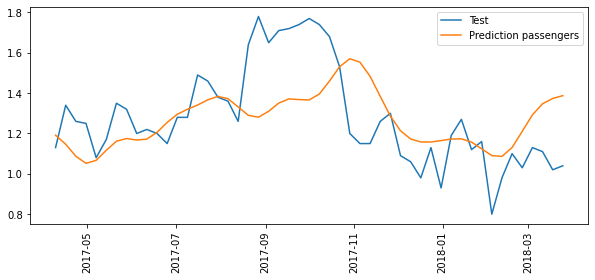

In [23]:
plt.figure(figsize=(10,4))
plt.plot(result['ytest'], label='Test')
plt.plot(result['yhat'], label='Prediction passengers')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

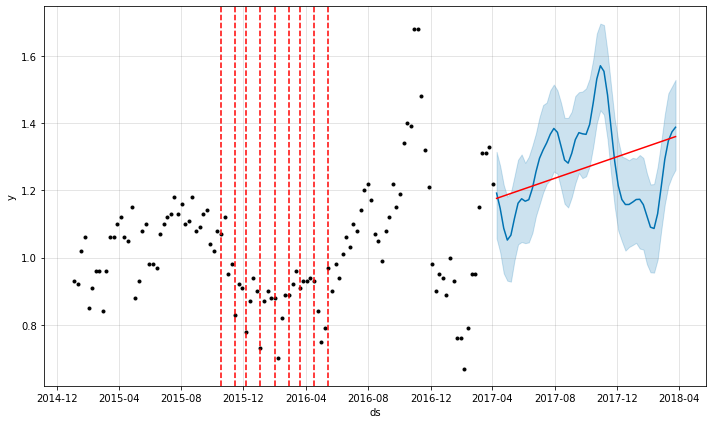

In [24]:
fig = model.plot(pre)
fig.show()
a = add_changepoints_to_plot(fig.gca(), model, pre)

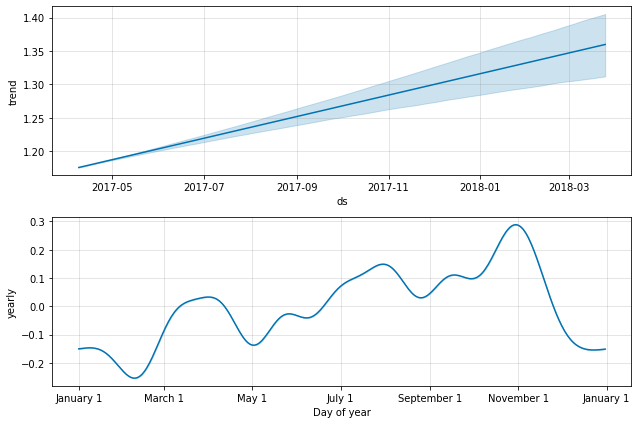

In [25]:
fig1 = model.plot_components(pre)
fig1.show()

In [26]:
mse = mean_squared_error(result['ytest'],result['yhat'])
mae = mean_absolute_error(result['ytest'],result['yhat'])
r2 = r2_score(result['ytest'],result['yhat'])

print('>>> MSE:', mse)
print('>>> MAE:', mae)
print('>>> score:', r2)

>>> MSE: 0.047860102478622824
>>> MAE: 0.16977608432961244
>>> score: 0.18472853206948192


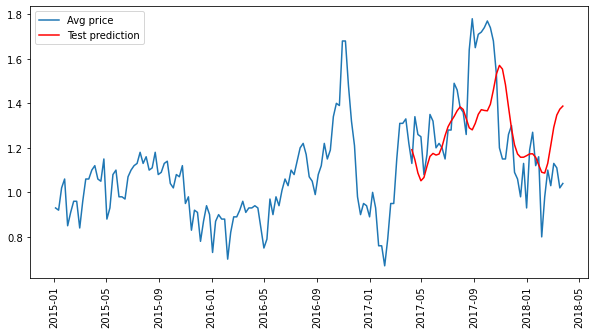

In [27]:
df1 = df.set_index('ds')

plt.figure(figsize=(10,5))
plt.plot(df1.y, label='Avg price')
plt.plot(result['yhat'], color='red',label='Test prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### Đánh giá
- Tuy kết quả r-score không cao nhưng dự đoán được xu hướng khá tốt

## Dự đoán giá bơ thường của vùng California trước 1 năm

In [28]:
m = Prophet().fit(df)
future = m.make_future_dataframe(periods=52,freq='W-SUN') 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.6465
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       343.705     0.0013852       76.0142     0.09897           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102        343.72    0.00176253       57.8592   2.456e-05       0.001      183  LS failed, Hessian reset 
     129       343.822   1.57305e-05        49.762   2.029e-07       0.001      258  LS failed, Hessian reset 
     161       343.823   1.48206e-06        79.445   1.924e-08       0.001      348  LS failed, Hessian reset 
     173       343.823   7.86592e-09       61.4519      0.1133      0.1133      364   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [29]:
forecast = m.predict(future)
forecast.shape

(221, 16)

In [30]:
len(df)

169

In [31]:
result = forecast[['ds','yhat']][:169]
result['ytest'] = list(df['y'])
result.set_index('ds',inplace=True)
print(result.shape)

(169, 2)


In [32]:
mse = mean_squared_error(result['ytest'],result['yhat'])
mae = mean_absolute_error(result['ytest'],result['yhat'])
r2 = r2_score(result['ytest'],result['yhat'])

print('>>> MSE:', mse)
print('>>> MAE:', mae)
print('>>> score:', r2)

>>> MSE: 0.01794928614094306
>>> MAE: 0.102236552831399
>>> score: 0.6575643237419144


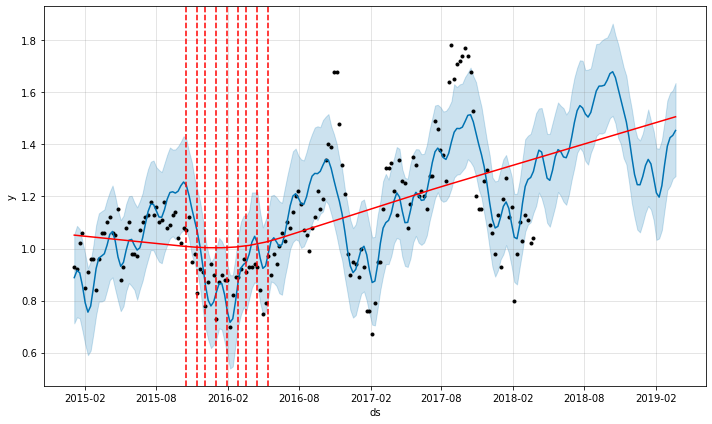

In [67]:
fig = m.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

### Đánh giá
- Mô hình fbprophet sử dụng toàn bộ dữ liệu để train cho ra kết quả tốt hơn rất nhiều với:
    - MSE: 0.01794928614094306
    - MAE: 0.102236552831399
    - r-score: 0.6575643237419144
#### => Xem xét áp dụng mô hình để dự đoán xu hướng, giá bơ năm sau

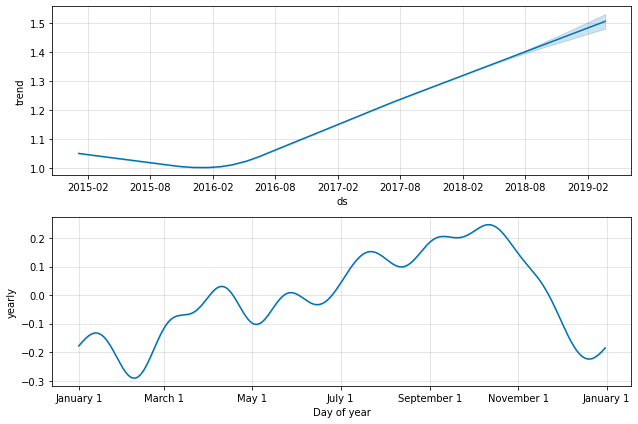

In [68]:
fig1 = m.plot_components(forecast)
fig1.show()

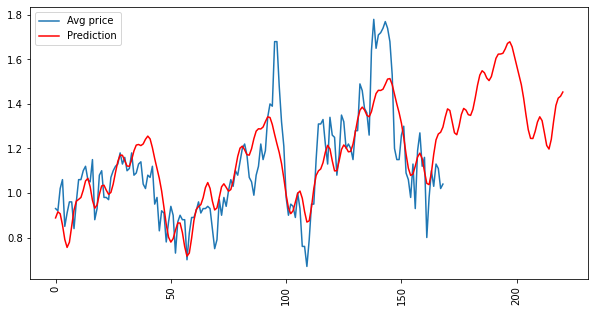

In [70]:
plt.figure(figsize=(10,5))
plt.plot(df.y, label='Avg price')
plt.plot(forecast['yhat'], color='red',
         label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [100]:
len(df), len(forecast) - len(df), 169 - 52, 117-52

(169, 52, 117, 65)

In [106]:
# df[64:116]

In [91]:
# 2017-03-26 -> 2018-03-25
df[-53:]['y'].describe()

count    53.000000
mean      1.280943
std       0.240194
min       0.800000
25%       1.130000
50%       1.220000
75%       1.360000
max       1.780000
Name: y, dtype: float64

In [93]:
# 2018-04-01 -> 2019-03-24 (du doan)
forecast[169:]['yhat'].describe()

count    52.000000
mean      1.426332
std       0.137134
min       1.197380
25%       1.322013
50%       1.386537
75%       1.533166
max       1.679240
Name: yhat, dtype: float64

## Đánh giá tổng thể
- Dữ liệu bất ổn định
- Phương sai dao động
- Giá trị trung bình tăng theo thời gian
- Có biểu hiện theo mùa
- Dự đoán giá bơ thường của vùng California trong năm sau (từ 2018-04-01 đến 2019-03-24) sẽ cao hơn năm trước đó (từ 2017-03-26 đến 2018-03-25) là 0.145389 với độ lệch chuẩn giảm 0.10306